In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("notebook", rc={"lines.linewidth": 2})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [6]:
cate = "primaryNivo"
ano = ".positive."
sur = "pfs"
df = pd.read_csv(f"{cate}{ano}_{sur}_significant_nodes_by_connectivity.txt")
#df

In [7]:
df.sort_values(by=["p"]).iloc[:15]

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
3440,WFDC11,4.822569,124.283907,1.083168,2.699599,6.945538,14.873767,1038.505558,0.0,4.452283,0.000008,16.844748
727,WFDC10A,3.777951,43.726353,0.962092,1.892285,5.663617,6.634509,288.189203,0.0,3.926807,0.000086,13.503947
2180,MYO9B,3.646099,38.324878,0.942400,1.799029,5.493169,6.043778,243.026177,0.0,3.868951,0.000109,13.159359
4518,PUS3,4.188383,65.916119,1.149834,1.934749,6.442017,6.922307,627.671460,0.0,3.642597,0.000270,11.855281
1966,CDC37,3.355491,28.659677,0.921212,1.549949,5.161033,4.711230,174.344514,0.0,3.642475,0.000270,11.854596
2719,ACIN1,3.770756,43.412866,1.046003,1.720627,5.820885,5.588030,337.270388,0.0,3.604917,0.000312,11.644999
4261,GRK1,3.670556,39.273717,1.034135,1.643689,5.697422,5.174222,298.097955,0.0,3.549398,0.000386,11.338690
1805,DEFB104A,3.150242,23.341719,0.907865,1.370860,4.929625,3.938735,138.327628,0.0,3.469946,0.000521,10.907638
1,MIR31HG,1.615771,5.031765,0.470750,0.693119,2.538423,1.999943,12.659692,0.0,3.432336,0.000598,10.706590
3146,GGH,3.648800,38.428535,1.089578,1.513266,5.784335,4.541538,325.165676,0.0,3.348818,0.000812,10.266997


import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
plt.scatter(x=df['exp(coef)'].apply(lambda x:np.log2(x)),y=df['p'].apply(lambda x:-np.log2(x)),s=1)
plt.xlabel("Hazzard Ratio")
plt.ylabel("-log2Pvalue")
#plt.axvline(-2,color="grey",linestyle="--")
#plt.axvline(2,color="grey",linestyle="--")
plt.axhline(6.644,color="grey",linestyle="--")

In [8]:
from adjustText import adjust_text

2.0944148970793077 16.844748469720773
1.6407432554334815 13.503946775308458
1.5834807858070155 13.159358996070825
1.8189916308950498 11.855280666017611
1.457271295797795 11.854595986611661
1.6376184594931686 11.644999493782912
1.594102010699097 11.33869008115467
1.3681328381929934 10.907638081115415
0.7017203788169525 10.706590300072767
1.5846538327536974 10.266996947028554
1.6084838433845678 10.171399436413205
1.7047789436843541 9.759604428032445
1.342858790814042 9.627412870007772
0.9425312850225659 9.616439105200083
1.5016412479552386 9.465563371509251


/tmp/ipykernel_1296452/1863895418.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(ax.text(np.log10(r['exp(coef)']), -np.log2(r['p']), r[0]))


<Figure size 576x432 with 0 Axes>

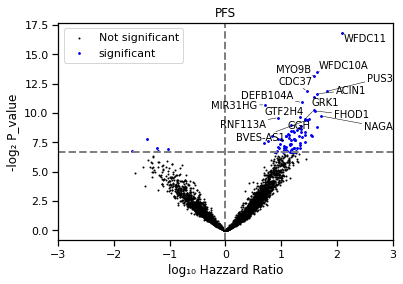

In [9]:
from gseapy import barplot, dotplot
import scienceplots

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
plt.rc('font', family='DejaVu Sans')

#plt.subplots(nrows=1, ncols=1, figsize=(4.6, 2.2))
ax .scatter(x=df['exp(coef)'].apply(lambda x:np.log10(x)),y=df['p'].apply(lambda x:-np.log2(x)),s=1,label="Not significant",color="k")

# highlight down- or up- regulated genes
down = df[(df['p']<=0.01)]

ax.scatter(x=down['exp(coef)'].apply(lambda x:np.log10(x)),y=down['p'].apply(lambda x:-np.log2(x)),s=3,label="significant",color="blue")
#plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

#for i,r in df[(df['p']<=0.0001)].iterrows():
#    plt.text(x=np.log10(r['exp(coef)']),y=-np.log2(r['p']),s=r[0], va="center",ha='center', fontsize=8)

texts = []
for i,r in df.sort_values(by=["p"]).iloc[:15].iterrows():
    #plt.text(x=np.log10(r['exp(coef)']),y=-np.log2(r['p']),s=r[0], va="center",ha='center', fontsize=8)
    print(np.log10(r['exp(coef)']),-np.log2(r['p']))
    if np.log10(r['exp(coef)']) == -np.inf:
        print("yes")
    else:
        texts.append(ax.text(np.log10(r['exp(coef)']), -np.log2(r['p']), r[0]))
    


plt.xlabel("log\N{SUBSCRIPT ONE}\N{SUBSCRIPT ZERO} Hazzard Ratio")
plt.ylabel("-log\N{SUBSCRIPT TWO} P_value")
#plt.axvline(-2,color="grey",linestyle="--")
#plt.axvline(2,color="grey",linestyle="--")
plt.axvline(np.log10(1),color="grey",linestyle="--")
plt.axhline(6.644,color="grey",linestyle="--")
plt.xlim([-3, 3])
plt.legend()
#plt.legend([],[], frameon=False)
#plt.legend(borderaxespad=0)
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
plt.title(f"{sur.upper()}")
plt.savefig(f"f3.{cate}{ano}_connectivity_{sur}_genes.svg",dpi=600,bbox_inches='tight')
plt.savefig(f"f3.{cate}{ano}_connectivity_{sur}_genes.tif",dpi=600,bbox_inches='tight')

In [6]:
df

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
0,B9D2,-1.094084,0.334846,0.737971,-2.540480,0.352312,0.078829,1.422353,0.0,-1.482557,0.138192,2.855253
1,MIR31HG,1.473192,4.363139,0.462227,0.567243,2.379141,1.763399,10.795621,0.0,3.187159,0.001437,9.442947
2,FAM181A-AS1,0.470108,1.600167,0.475035,-0.460944,1.401160,0.630688,4.059907,0.0,0.989628,0.322356,1.633273
3,SPRYD4,-0.673554,0.509893,0.634492,-1.917136,0.570028,0.147027,1.768316,0.0,-1.061564,0.288434,1.793689
4,LINC00559,-0.396252,0.672837,0.676805,-1.722765,0.930261,0.178572,2.535171,0.0,-0.585474,0.558229,0.841071
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CLASRP,1.655640,5.236429,1.183697,-0.664363,3.975642,0.514601,53.284338,0.0,1.398703,0.161902,2.626806
4996,C4A-AS1,-0.417641,0.658599,1.300376,-2.966332,2.131050,0.051492,8.423706,0.0,-0.321169,0.748082,0.418732
4997,ARGFX,1.067583,2.908341,1.254565,-1.391320,3.526486,0.248747,34.004260,0.0,0.850958,0.394793,1.340833
4998,C4B-AS1,-0.417333,0.658802,1.300426,-2.966121,2.131455,0.051503,8.427122,0.0,-0.320920,0.748271,0.418367


In [7]:
df["loghr"] = np.log10(df['exp(coef)'])
df['logp'] = -np.log2(df['p'])

In [8]:
df

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),loghr,logp
0,B9D2,-1.094084,0.334846,0.737971,-2.540480,0.352312,0.078829,1.422353,0.0,-1.482557,0.138192,2.855253,-0.475155,2.855253
1,MIR31HG,1.473192,4.363139,0.462227,0.567243,2.379141,1.763399,10.795621,0.0,3.187159,0.001437,9.442947,0.639799,9.442947
2,FAM181A-AS1,0.470108,1.600167,0.475035,-0.460944,1.401160,0.630688,4.059907,0.0,0.989628,0.322356,1.633273,0.204165,1.633273
3,SPRYD4,-0.673554,0.509893,0.634492,-1.917136,0.570028,0.147027,1.768316,0.0,-1.061564,0.288434,1.793689,-0.292521,1.793689
4,LINC00559,-0.396252,0.672837,0.676805,-1.722765,0.930261,0.178572,2.535171,0.0,-0.585474,0.558229,0.841071,-0.172090,0.841071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CLASRP,1.655640,5.236429,1.183697,-0.664363,3.975642,0.514601,53.284338,0.0,1.398703,0.161902,2.626806,0.719035,2.626806
4996,C4A-AS1,-0.417641,0.658599,1.300376,-2.966332,2.131050,0.051492,8.423706,0.0,-0.321169,0.748082,0.418732,-0.181379,0.418732
4997,ARGFX,1.067583,2.908341,1.254565,-1.391320,3.526486,0.248747,34.004260,0.0,0.850958,0.394793,1.340833,0.463645,1.340833
4998,C4B-AS1,-0.417333,0.658802,1.300426,-2.966121,2.131455,0.051503,8.427122,0.0,-0.320920,0.748271,0.418367,-0.181245,0.418367


In [9]:
import decoupler as dc

/home/yinli/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


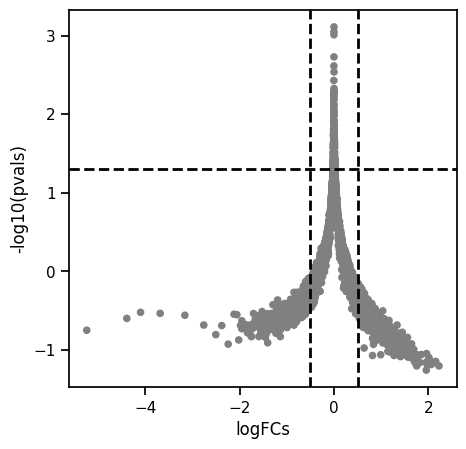

In [10]:
dc.plot_volcano_df(
    df,
    x='loghr',
    y='logp',
    top=20,
    figsize=(5, 5)
)